<a href="https://colab.research.google.com/github/chaymaebk/mnist1/blob/main/Projet_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive # Importer la fonctionnalité de montage de Google Drive
import numpy as np
import pandas as pd
import io
# Accéder au répertoire contenant les données de test et d'entrainement

%cd /content/drive/MyDrive/CNNprojet/archive (4)/mnist_png/test
%cd /content/drive/MyDrive/CNNprojet/archive (4)/mnist_png/train

/content/drive/MyDrive/CNNprojet/archive (4)/mnist_png/test
/content/drive/MyDrive/CNNprojet/archive (4)/mnist_png/train


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive  # Importer à nouveau la fonctionnalité de montage de Google Drive
import os  # Importer la bibliothèque pour interagir avec le système d'exploitation
import glob  # Importer la bibliothèque pour rechercher des chemins de fichiers
import random  # Importer la bibliothèque pour la génération de nombres aléatoires
import matplotlib.pyplot as plt  # Importer la bibliothèque pour la visualisation de données
import imageio  # Importer la bibliothèque pour la manipulation d'images


# Monter Google Drive
drive.mount('/content/drive')

# Définir le chemin d'accès aux données
root_path = os.path.expanduser('/content/drive/MyDrive/CNNprojet/archive (4)/mnist_png')

# Afficher la structure des répertoires
train_dirs = os.listdir(os.path.join(root_path, 'train'))  # Lister les répertoires dans le répertoire 'train'
test_dirs = os.listdir(os.path.join(root_path, 'test'))  # Lister les répertoires dans le répertoire 'test'
print("Categories dans le dossier 'train' :", train_dirs)  # Afficher les catégories dans le dossier 'train'
print("Categories dans le dossier 'test' :", test_dirs)  # Afficher les catégories dans le dossier 'test'






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Categories dans le dossier 'train' : ['3', '9', '6', '8', '2', '1', '7', '5', '0', '4']
Categories dans le dossier 'test' : ['4', '7', '1', '3', '9', '5', '8', '0', '6', '2']


In [ ]:

# Utiliser glob pour trouver toutes les images dans les sous-répertoires train et test
# Trouver tous les fichiers .png dans les répertoires 'train' et 'test'
#Une fois les chemins trouvés, ils sont ajoutés à la liste all_images. Cette liste contiendra donc tous les chemins des fichiers PNG dans les répertoires 'train' et 'test'.
all_images = glob.glob(os.path.join(root_path, 'train', '*', '*.png')) + glob.glob(os.path.join(root_path, 'test', '*', '*.png'))

# Cela garantit que l'échantillon à afficher ne dépasse pas le nombre total d'images disponibles.
# Définir le nombre d'images à afficher
num_images_to_display = 5
# Déterminer la taille de l'échantillon à utiliser, limitée par le nombre total d'images disponibles
sample_size = min(num_images_to_display, len(all_images))

# Pour éviter les erreurs de mémoire, nous sélectionnons un sous-ensemble aléatoire d'images à partir de toutes les images disponibles.
all_images_sampled = random.sample(all_images, sample_size)

<ipython-input-5-1563d5c22809>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(img_path)


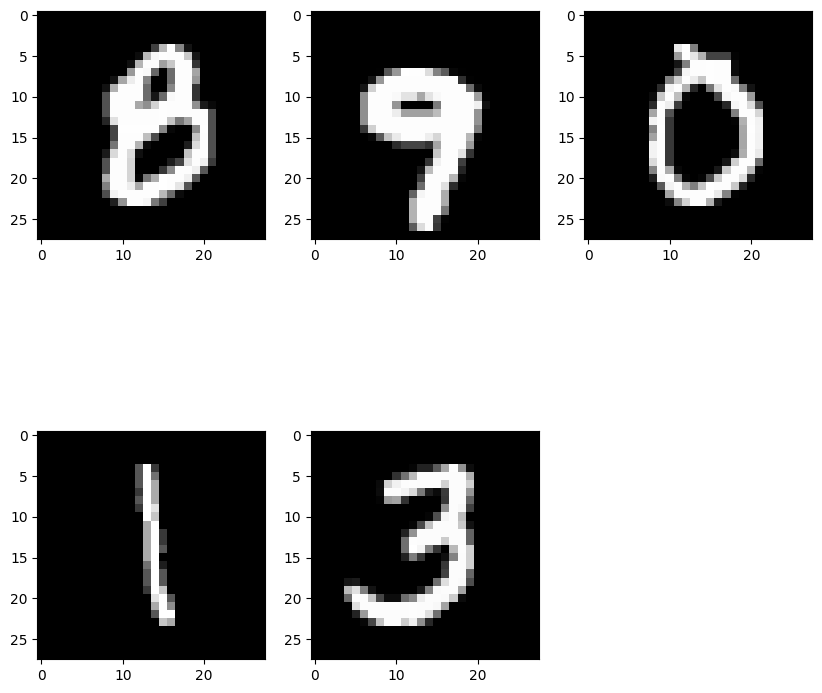

In [ ]:
# Afficher quelques images pour se familiariser avec les données
# Créer une nouvelle figure avec une taille de 10x10 pouces
fig = plt.figure(figsize=(10, 10))

# Itérer à travers chaque chemin d'image dans l'échantillon
for i, img_path in enumerate(all_images_sampled, 1):

    # Charger l'image en tant que tableau numpy
    img_arr = imageio.imread(img_path)

    # Ajouter un sous-graphique à la figure, la grille 2x3, positionné à l'index i
    ax = fig.add_subplot(2, 3, i)

    # Afficher l'image dans le sous-graphique avec une carte de couleur en niveaux de gris
    ax.imshow(img_arr, cmap='gray')

# Afficher la figure complète contenant les images
plt.show()


In [ ]:
import tensorflow as tf  # Importer la bibliothèque TensorFlow pour créer et entraîner des modèles de machine learning

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  # Charger les données du dataset MNIST, qui contient des images de chiffres manuscrits et leurs étiquettes

# Normaliser les images pour que les valeurs soient entre 0 et 1
x_train = x_train.astype('float32') / 255.0  # Convertir les images d'entraînement en type float32
x_test = x_test.astype('float32') / 255.0  # Convertir les images de test en type float32 et les normaliser pour que les valeurs soient entre 0 et 1


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.utils import to_categorical  # Importer la fonction to_categorical de Keras pour la conversion des labels en vecteurs binaires
from sklearn.model_selection import train_test_split  # Importer la fonction train_test_split de scikit-learn pour séparer les ensembles de données

# Conversion des labels en vecteurs binaires (one-hot encoding)
#le one-hot encoding des labels permet l'utilisation efficace de la fonction de perte categorical_crossentropy lors de la compilation du modèle
y_train = to_categorical(y_train)  # Convertir les labels d'entraînement en vecteurs binaires (one-hot encoding) pour les rendre compatibles avec la sortie du modèle de réseau de neurones
y_test = to_categorical(y_test)  # Convertir les labels de test en vecteurs binaires (one-hot encoding) pour les rendre compatibles avec la sortie du modèle de réseau de neurones

# Séparation des données d'entraînement en ensembles d'entraînement et de validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)  # Séparer les données d'entraînement en ensembles d'entraînement (80%) et de validation (20%) pour évaluer la performance du modèle pendant l'entraînement

# Afficher les dimensions des ensembles de données
print(f'Training set shape: {x_train.shape}, Labels shape: {y_train.shape}')  # Afficher la forme de l'ensemble d'entraînement et des labels d'entraînement pour vérifier la dimensionnalité
print(f'Validation set shape: {x_val.shape}, Labels shape: {y_val.shape}')  # Afficher la forme de l'ensemble de validation et des labels de validation pour vérifier la dimensionnalité
print(f'Test set shape: {x_test.shape}, Labels shape: {y_test.shape}')  # Afficher la forme de l'ensemble de test et des labels de test pour vérifier la dimensionnalité



Training set shape: (48000, 28, 28), Labels shape: (48000, 10)
Validation set shape: (12000, 28, 28), Labels shape: (12000, 10)
Test set shape: (10000, 28, 28), Labels shape: (10000, 10)


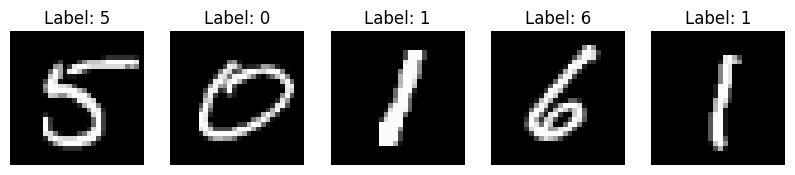

In [ ]:
# Visualiser quelques exemples d'images d'entraînement
num_images = 5  # Définir le nombre d'images à afficher
plt.figure(figsize=(10, 2))  # Créer une nouvelle figure avec une taille de 10x2 pouces

for i in range(num_images):  # Boucler sur le nombre d'images à afficher
    plt.subplot(1, num_images, i + 1)  # Ajouter un sous-plot à la figure
    plt.imshow(x_train[i], cmap='gray')  # Afficher l'image d'entraînement i en niveaux de gris
    plt.title(f'Label: {np.argmax(y_train[i])}')  # Ajouter un titre avec le label de l'image
    plt.axis('off')  # Désactiver les axes

plt.show()  # Afficher la figure


In [ ]:
# Construction du modèle CNN
model = tf.keras.Sequential([  # Initialiser un modèle séquentiel
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Ajouter une couche de convolution avec 32 filtres, une taille de filtre de 3x3
    # une activation ReLU ce qui permet au réseau de neurones d'apprendre des relations plus complexes dans les données. #et une forme d'entrée de 28x28x1
    # - Une fonction d'activation ReLU pour introduire de la non-linéarité
    # - Une forme d'entrée de 28x28x1 (28x28 pixels, 1 canal pour images en niveaux de gris)
#Les couches de pooling réduisent la dimensionnalité de la représentation tout en conservant les caractéristiques les plus importantes.
    tf.keras.layers.MaxPooling2D((2, 2)),  # Ajouter une couche de pooling avec une taille de pool de 2x2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Ajouter une deuxième couche de convolution avec 64 filtres, une taille de noyau de 3x3 et une activation ReLU
    tf.keras.layers.MaxPooling2D((2, 2)),  # Ajouter une deuxième couche de pooling avec une taille de pool de 2x2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Ajouter une troisième couche de convolution avec 64 filtres, une taille de noyau de 3x3 et une activation ReLU
    tf.keras.layers.Flatten(),  # Aplatir les sorties des couches précédentes en un vecteur
    tf.keras.layers.Dense(64, activation='relu'),  # Ajouter une couche entièrement connectée avec 64 unités et une activation ReLU
    tf.keras.layers.Dense(10, activation='softmax')  # Ajouter une couche de sortie avec 10 unités et une activation softmax pour la classification
])
#Dense : C'est une couche entièrement connectée.Chaque neurone de cette couche est connecté à tous les neurones de la couche précédente.
#softmax Elle convertit les sorties des neurones en probabilités, où la somme des probabilités est égale à 1. C

In [ ]:
# Compilation du modèle
#L'optimiseur est utilisé pour mettre à jour les poids du modèle en fonction de la fonction de perte
#adam adapte les taux d'apprentissage pour chaque paramètre.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Utiliser la Categorical Crossentropy comme fonction de perte
              metrics=['accuracy'])  # Évaluer le modèle en utilisant la précision comme métrique


In [ ]:
# Entraînement du modèle
# Entraîner le modèle sur les données d'entraînement, avec 5 époques et une taille de lot de 64, en utilisant l'ensemble de validation pour évaluer la performance à chaque époque
history = model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5, batch_size=64, validation_data=(x_val.reshape(-1, 28, 28, 1), y_val))
# Évaluation du modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test, verbose=2)  # Évaluer le modèle sur les données de test et récupérer la perte et la précision
print('\nTest accuracy:', test_acc)  # Afficher la précision sur l'ensemble de test


Epoch 1/5
750/750 [==============================] - 48s 62ms/step - loss: 0.2136 - accuracy: 0.9336 - val_loss: 0.0765 - val_accuracy: 0.9757
Epoch 2/5
750/750 [==============================] - 44s 59ms/step - loss: 0.0591 - accuracy: 0.9821 - val_loss: 0.0655 - val_accuracy: 0.9803
Epoch 3/5
750/750 [==============================] - 46s 62ms/step - loss: 0.0398 - accuracy: 0.9874 - val_loss: 0.0409 - val_accuracy: 0.9877
Epoch 4/5
750/750 [==============================] - 47s 63ms/step - loss: 0.0326 - accuracy: 0.9895 - val_loss: 0.0452 - val_accuracy: 0.9862
Epoch 5/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0366 - val_accuracy: 0.9897
313/313 - 2s - loss: 0.0284 - accuracy: 0.9904 - 2s/epoch - 7ms/step

Test accuracy: 0.9904000163078308


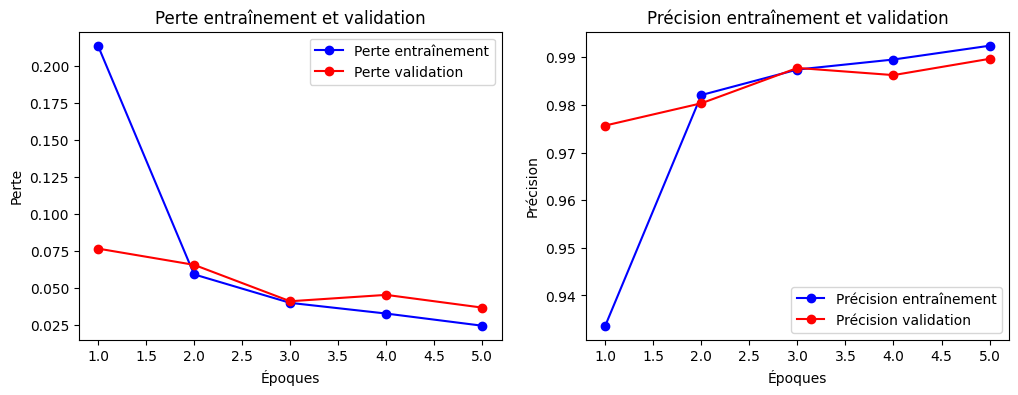

In [ ]:
import matplotlib.pyplot as plt  # Importer la bibliothèque matplotlib pour tracer des graphiques

# Récupérer les données d'entraînement
history_dict = history.history  # Obtenir l'historique de l'entraînement du modèle, qui contient les valeurs de perte et de précision pour chaque époque

# Extraire les valeurs de perte et de précision
loss_values = history_dict['loss']  # Récupérer les valeurs de la perte d'entraînement pour chaque époque
val_loss_values = history_dict['val_loss']  # Récupérer les valeurs de la perte de validation pour chaque époque
acc_values = history_dict['accuracy']  # Récupérer les valeurs de la précision d'entraînement pour chaque époque
val_acc_values = history_dict['val_accuracy']  # Récupérer les valeurs de la précision de validation pour chaque époque

# Créer une liste des époques
epochs = range(1, len(loss_values) + 1)  # Générer une séquence de nombres représentant chaque époque d'entraînement

# Tracer la perte
plt.figure(figsize=(12, 4))  # Créer une nouvelle figure avec une taille de 12x4 pouces
plt.subplot(1, 2, 1)  # Ajouter un sous-graphique (1ère position sur une grille de 1x2)
plt.plot(epochs, loss_values, 'bo-', label='Perte entraînement')  # Tracer les valeurs de perte d'entraînement (points bleus avec lignes)
plt.plot(epochs, val_loss_values, 'ro-', label='Perte validation')  # Tracer les valeurs de perte de validation (points rouges avec lignes)
plt.title('Perte entraînement et validation')  # Ajouter un titre au graphique de perte
plt.xlabel('Époques')  # Ajouter un label à l'axe des x
plt.ylabel('Perte')  # Ajouter un label à l'axe des y
plt.legend()  # Ajouter une légende pour distinguer les courbes de perte d'entraînement et de validation

# Tracer la précision
plt.subplot(1, 2, 2)  # Ajouter un sous-graphique (2ème position sur une grille de 1x2)
plt.plot(epochs, acc_values, 'bo-', label='Précision entraînement')  # Tracer les valeurs de précision d'entraînement (points bleus avec lignes)
plt.plot(epochs, val_acc_values, 'ro-', label='Précision validation')  # Tracer les valeurs de précision de validation (points rouges avec lignes)
plt.title('Précision entraînement et validation')  # Ajouter un titre au graphique de précision
plt.xlabel('Époques')  # Ajouter un label à l'axe des x
plt.ylabel('Précision')  # Ajouter un label à l'axe des y
plt.legend()  # Ajouter une légende pour distinguer les courbes de précision d'entraînement et de validation

plt.show()  # Afficher les graphiques
# Perte d'entraînement et de validation :
# La courbe "Perte entraînement" montre comment la perte (ou l'erreur) du modèle évolue au fil des époques pendant l'entraînement sur les données d'entraînement.
# La courbe "Perte validation" montre comment la perte évolue sur un ensemble de données de validation, qui est généralement distinct de l'ensemble d'entraînement et est utilisé pour évaluer la performance du modèle sur des données non vues pendant l'entraînement.

# Précision d'entraînement et de validation :
# La courbe "Précision entraînement" montre comment la précision du modèle (le pourcentage de prédictions correctes) évolue au fil des époques pendant l'entraînement sur les données d'entraînement.
# La courbe "Précision validation" montre comment la précision évolue sur l'ensemble de validation, donnant une indication de la capacité du modèle à généraliser sur de nouvelles données.
#Si la différence entre la courbe de perte d'entraînement et celle de validation diminue de manière significative au fil des époques,
#cela indique que le modèle apprend efficacement sans surapprentissage
#car les performances sur les données d'entraînement et de validation convergent vers des valeurs similaires."
#Une courbe de précision qui augmente régulièrement à la fois pour l'entraînement et la validation indique que le modèle devient plus précis dans ses prédictions.


In [ ]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(x_test.reshape(-1, 28, 28, 1))  # Faire des prédictions sur l'ensemble de test en redimensionnant les données d'entrée
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtenir les classes prédites en prenant l'indice du maximum de chaque prédiction
y_true_classes = np.argmax(y_test, axis=1)  # Obtenir les vraies classes en prenant l'indice du maximum de chaque label de test
y_pred  # Afficher les prédictions


313/313 [==============================] - 5s 16ms/step


array([[1.44485912e-09, 1.78765198e-08, 9.15106284e-08, ...,
        9.99999225e-01, 2.48947941e-07, 5.58213351e-08],
       [8.01347344e-09, 6.35243609e-08, 9.99999821e-01, ...,
        6.02259562e-12, 5.01039210e-09, 5.46852234e-12],
       [1.10319354e-06, 9.99966562e-01, 1.11887482e-06, ...,
        3.13409913e-07, 6.89167928e-06, 4.87132593e-06],
       ...,
       [2.39425070e-13, 7.79388332e-10, 3.67269617e-11, ...,
        4.87211826e-10, 2.60194195e-08, 3.56631176e-07],
       [4.00774667e-07, 1.17994869e-09, 1.46524876e-10, ...,
        1.11293659e-07, 5.22318114e-05, 3.78295262e-08],
       [3.02454595e-07, 1.81340040e-10, 4.53404816e-08, ...,
        5.08016413e-14, 1.75879518e-06, 1.14091715e-10]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report  # Importer les fonctions pour évaluer les performances du modèle

# Matrice de confusion
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)  # Calculer la matrice de confusion entre les vraies classes et les classes prédites
conf_matrix  # Afficher la matrice de confusion
#La matrice est de taille 10x10, car il y a 10 classes (chiffres de 0 à 9).
#Chaque ligne représente la classe réelle (vraie classe) et chaque colonne représente la classe prédite par le modèle.
#Les valeurs sur la diagonale indiquent le nombre de prédictions correctes pour chaque classe.
#Les valeurs en dehors de la diagonale représentent les erreurs de classification.
#la matrice de confusion permet d'évaluer la précision du modèle pour chaque classe et d'identifier les classes qui sont souvent confondues entre elles.

array([[ 978,    0,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1129,    0,    1,    0,    0,    3,    1,    1,    0],
       [   0,    2, 1028,    0,    0,    0,    0,    1,    1,    0],
       [   0,    0,    1, 1000,    0,    6,    0,    0,    3,    0],
       [   0,    0,    0,    0,  966,    0,    4,    2,    0,   10],
       [   2,    0,    0,    3,    0,  881,    3,    1,    2,    0],
       [   2,    1,    0,    0,    0,    2,  951,    0,    2,    0],
       [   0,    3,   18,    0,    0,    0,    0,  999,    0,    8],
       [   2,    0,    4,    0,    0,    0,    1,    3,  962,    2],
       [   2,    0,    0,    1,    2,    5,    0,    2,    2,  995]])

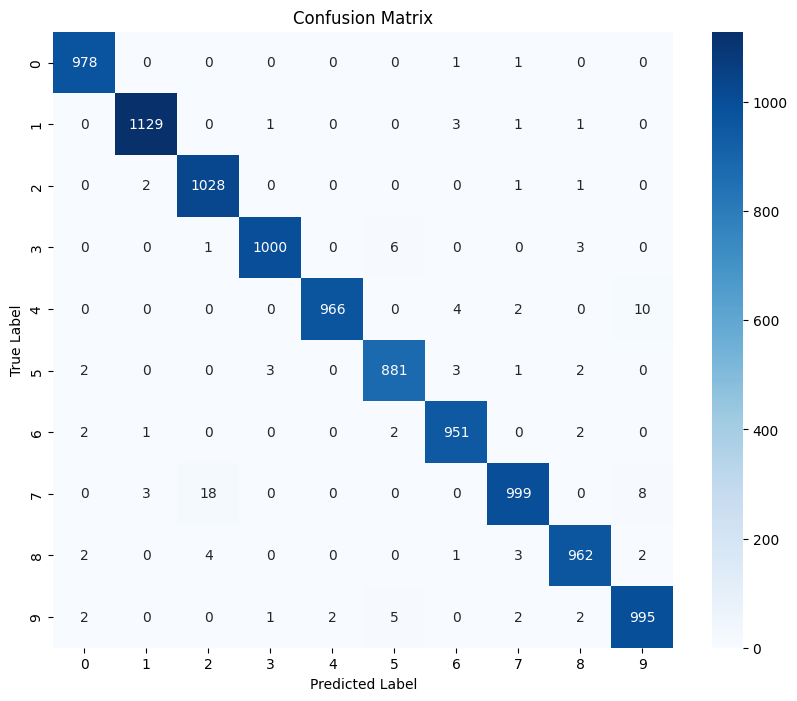

In [ ]:
import seaborn as sns  # Importer la bibliothèque Seaborn pour la visualisation de données

# Afficher la matrice de confusion
plt.figure(figsize=(10, 8))  # Créer une nouvelle figure avec une taille de 10x8 pouces
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # Afficher la matrice de confusion avec des annotations et un style de couleur bleu
plt.xlabel('Predicted Label')  # Ajouter une étiquette à l'axe des abscisses
plt.ylabel('True Label')  # Ajouter une étiquette à l'axe des ordonnées
plt.title('Confusion Matrix')  # Ajouter un titre à la figure
plt.show()  # Afficher la figure


In [ ]:
# Rapport de classification
class_report = classification_report(y_true_classes, y_pred_classes)  # Générer le rapport de classification
print('Classification Report:')  # Afficher l'en-tête du rapport
print(class_report)  # Afficher le rapport de classification


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Importer le générateur d'images pour l'augmentation des données
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Créer un générateur d'images avec augmentation de données
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)  # Définition des paramètres d'augmentation de données


In [ ]:
# Définir un modèle CNN avec une architecture différente
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Couche de convolution avec 64 filtres
    tf.keras.layers.MaxPooling2D((2, 2)),  # Couche de pooling
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Deuxième couche de convolution avec 128 filtres
    tf.keras.layers.MaxPooling2D((2, 2)),  # Deuxième couche de pooling
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Troisième couche de convolution avec 128 filtres
    tf.keras.layers.Flatten(),  # Aplatir les données
    tf.keras.layers.Dense(128, activation='relu'),  # Couche dense avec 128 neurones
    tf.keras.layers.Dense(10, activation='softmax')  # Couche de sortie avec fonction d'activation softmax
])


In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compiler le modèle avec l'optimiseur Adam
history2 = model2.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))  # Entraîner le modèle


Epoch 1/5
750/750 [==============================] - 130s 171ms/step - loss: 0.1593 - accuracy: 0.9491 - val_loss: 0.0573 - val_accuracy: 0.9817
Epoch 2/5
750/750 [==============================] - 129s 172ms/step - loss: 0.0430 - accuracy: 0.9861 - val_loss: 0.0383 - val_accuracy: 0.9884
Epoch 3/5
750/750 [==============================] - 126s 168ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0422 - val_accuracy: 0.9872
Epoch 4/5
750/750 [==============================] - 122s 162ms/step - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0350 - val_accuracy: 0.9904
Epoch 5/5
750/750 [==============================] - 122s 163ms/step - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0470 - val_accuracy: 0.9872


In [ ]:
# Évaluation des deux modèles sur l'ensemble de test
loss_model, acc_model = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test, verbose=0)  # Évaluer le premier modèle sur les données de test
loss_model2, acc_model2 = model2.evaluate(x_test.reshape(-1, 28, 28, 1), y_test, verbose=0)  # Évaluer le deuxième modèle sur les données de test

print("Modèle 1 - Perte: {:.4f}, Précision: {:.4f}".format(loss_model, acc_model))
print("Modèle 2 - Perte: {:.4f}, Précision: {:.4f}".format(loss_model2, acc_model2))

Modèle 1 - Perte: 0.0333, Précision: 0.9889
Modèle 2 - Perte: 0.0279, Précision: 0.9918
